In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# Load data
sales_df = pd.read_csv('Salesdata.csv')
stores_df = pd.read_csv('store.csv')

<ipython-input-4-c01abbb0a2ba>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv('Salesdata.csv')


In [5]:
# Merge datasets on store id
data = pd.merge(sales_df, stores_df, on=['Store'], how='inner')
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,30-07-2015,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,29-07-2015,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,28-07-2015,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,27-07-2015,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [71]:
df = data.copy()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

## Exploratory data analysis

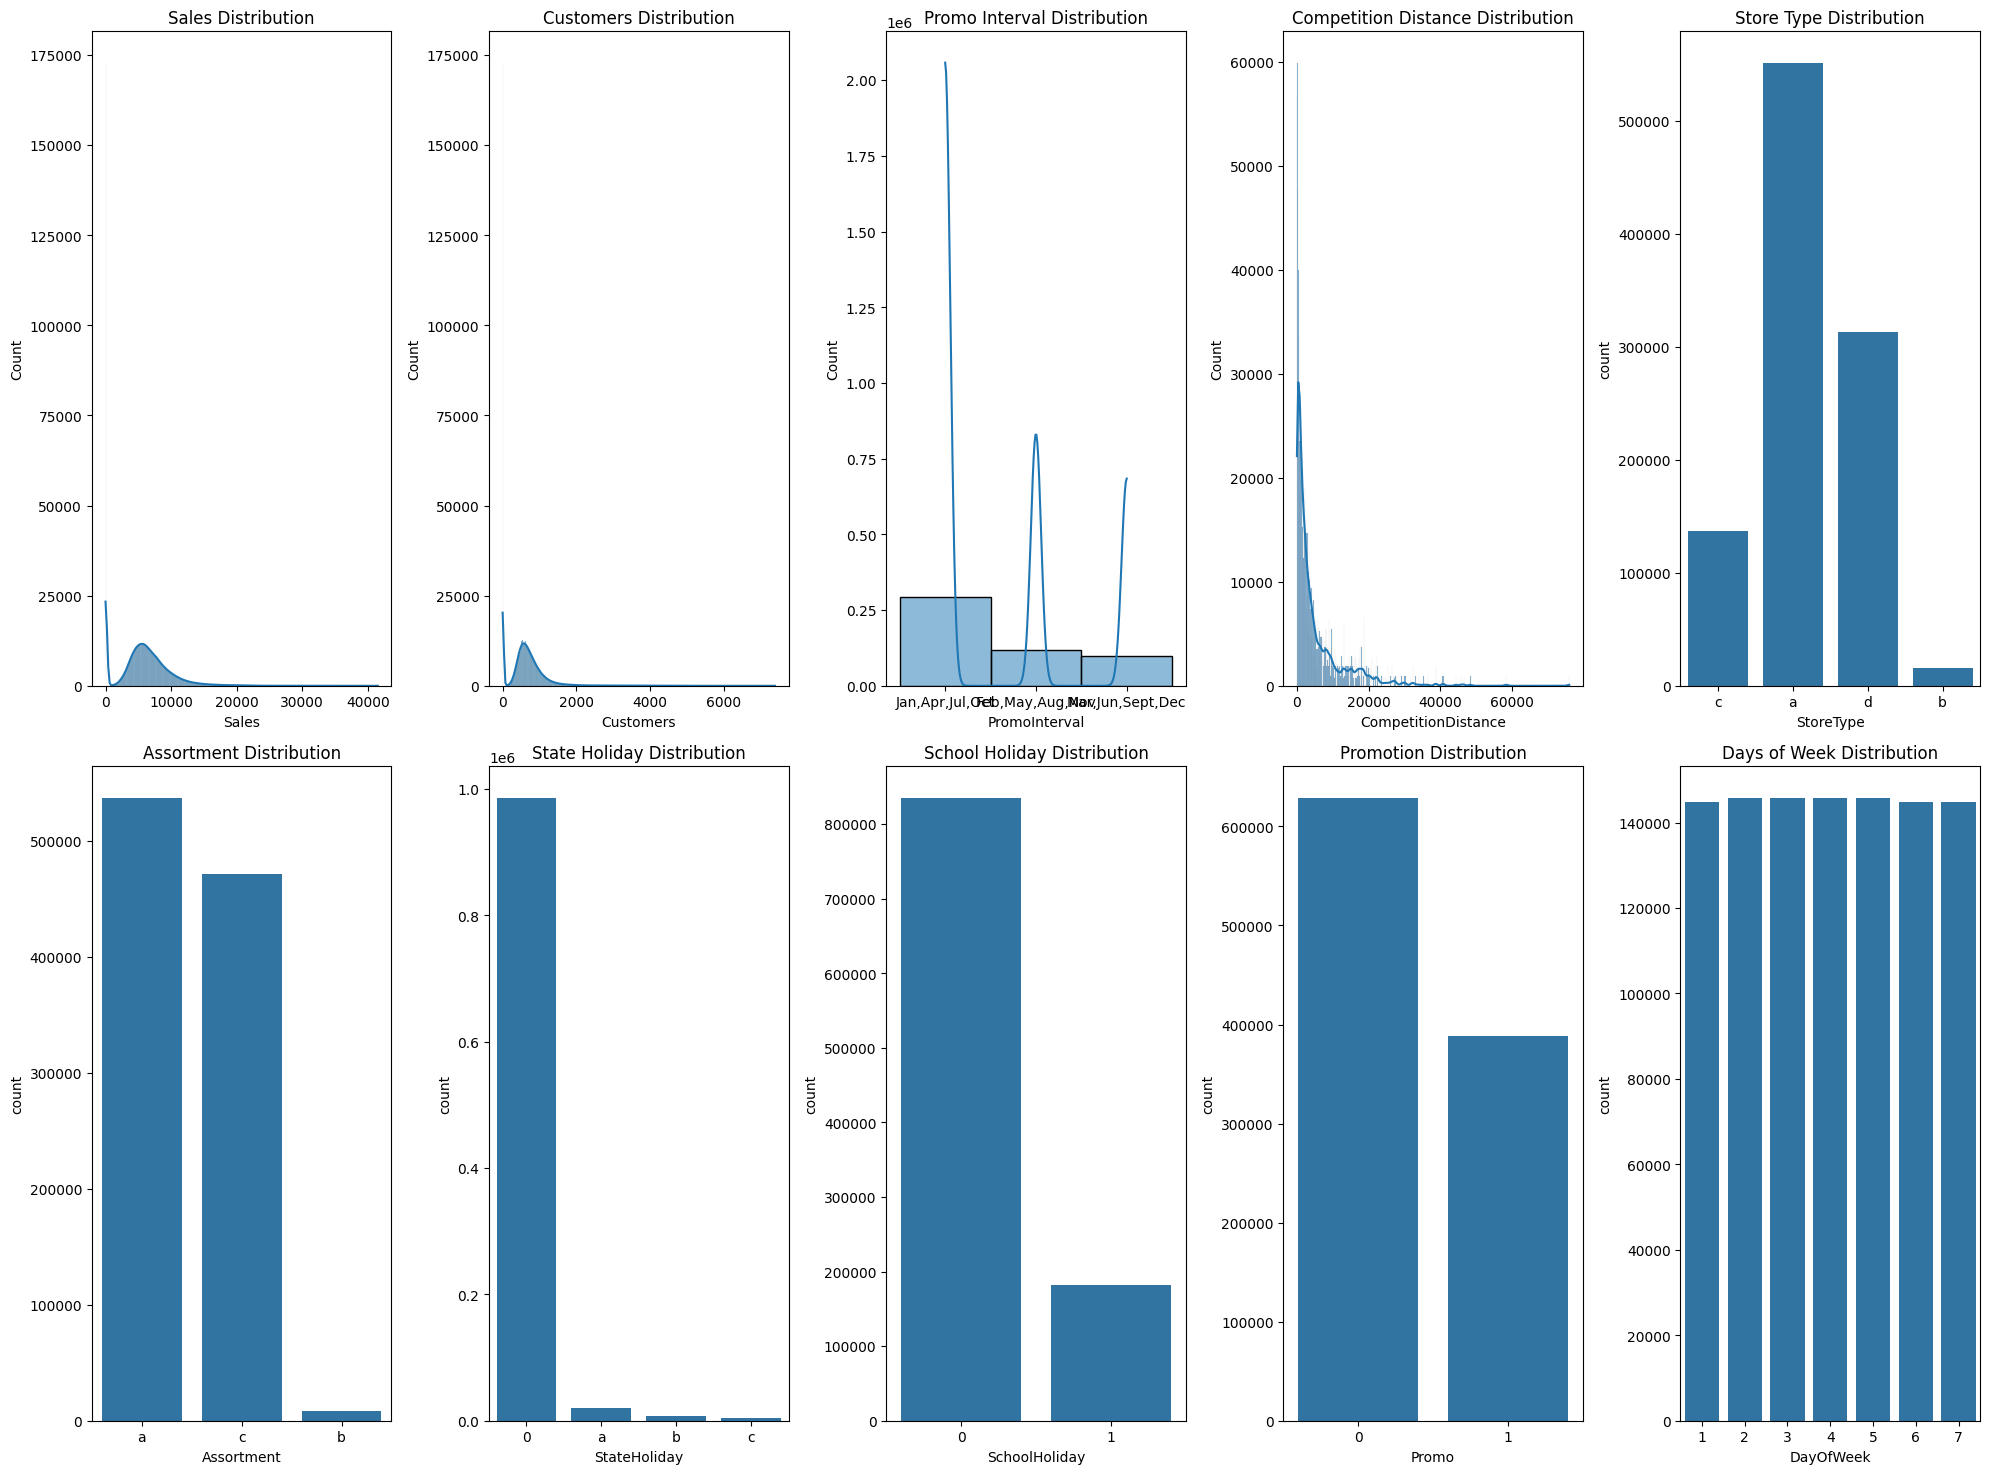

In [18]:
# Univariate Analysis
def univariate_analysis(df):
    plt.figure(figsize=(20, 15))

    plt.subplot(2, 5, 1)
    sns.histplot(df['Sales'], kde=True)
    plt.title('Sales Distribution')

    plt.subplot(2, 5, 2)
    sns.histplot(df['Customers'], kde=True)
    plt.title('Customers Distribution')

    plt.subplot(2, 5, 3)
    sns.histplot(df['PromoInterval'], kde=True)
    plt.title('Promo Interval Distribution')

    plt.subplot(2, 5, 4)
    sns.histplot(df['CompetitionDistance'], kde=True)
    plt.title('Competition Distance Distribution')

    plt.subplot(2, 5, 5)
    sns.countplot(x='StoreType', data=df)
    plt.title('Store Type Distribution')

    plt.subplot(2, 5, 6)
    sns.countplot(x='Assortment', data=df)
    plt.title('Assortment Distribution')

    plt.subplot(2, 5, 7)
    sns.countplot(x='StateHoliday', data=df)
    plt.title('State Holiday Distribution')

    plt.subplot(2, 5, 8)
    sns.countplot(x='SchoolHoliday', data=df)
    plt.title('School Holiday Distribution')

    plt.subplot(2, 5, 9)
    sns.countplot(x='Promo', data=df)
    plt.title('Promotion Distribution')

    plt.subplot(2, 5, 10)
    sns.countplot(x='DayOfWeek', data=df)
    plt.title('Days of Week Distribution')

    plt.tight_layout()
    plt.show()

univariate_analysis(df)

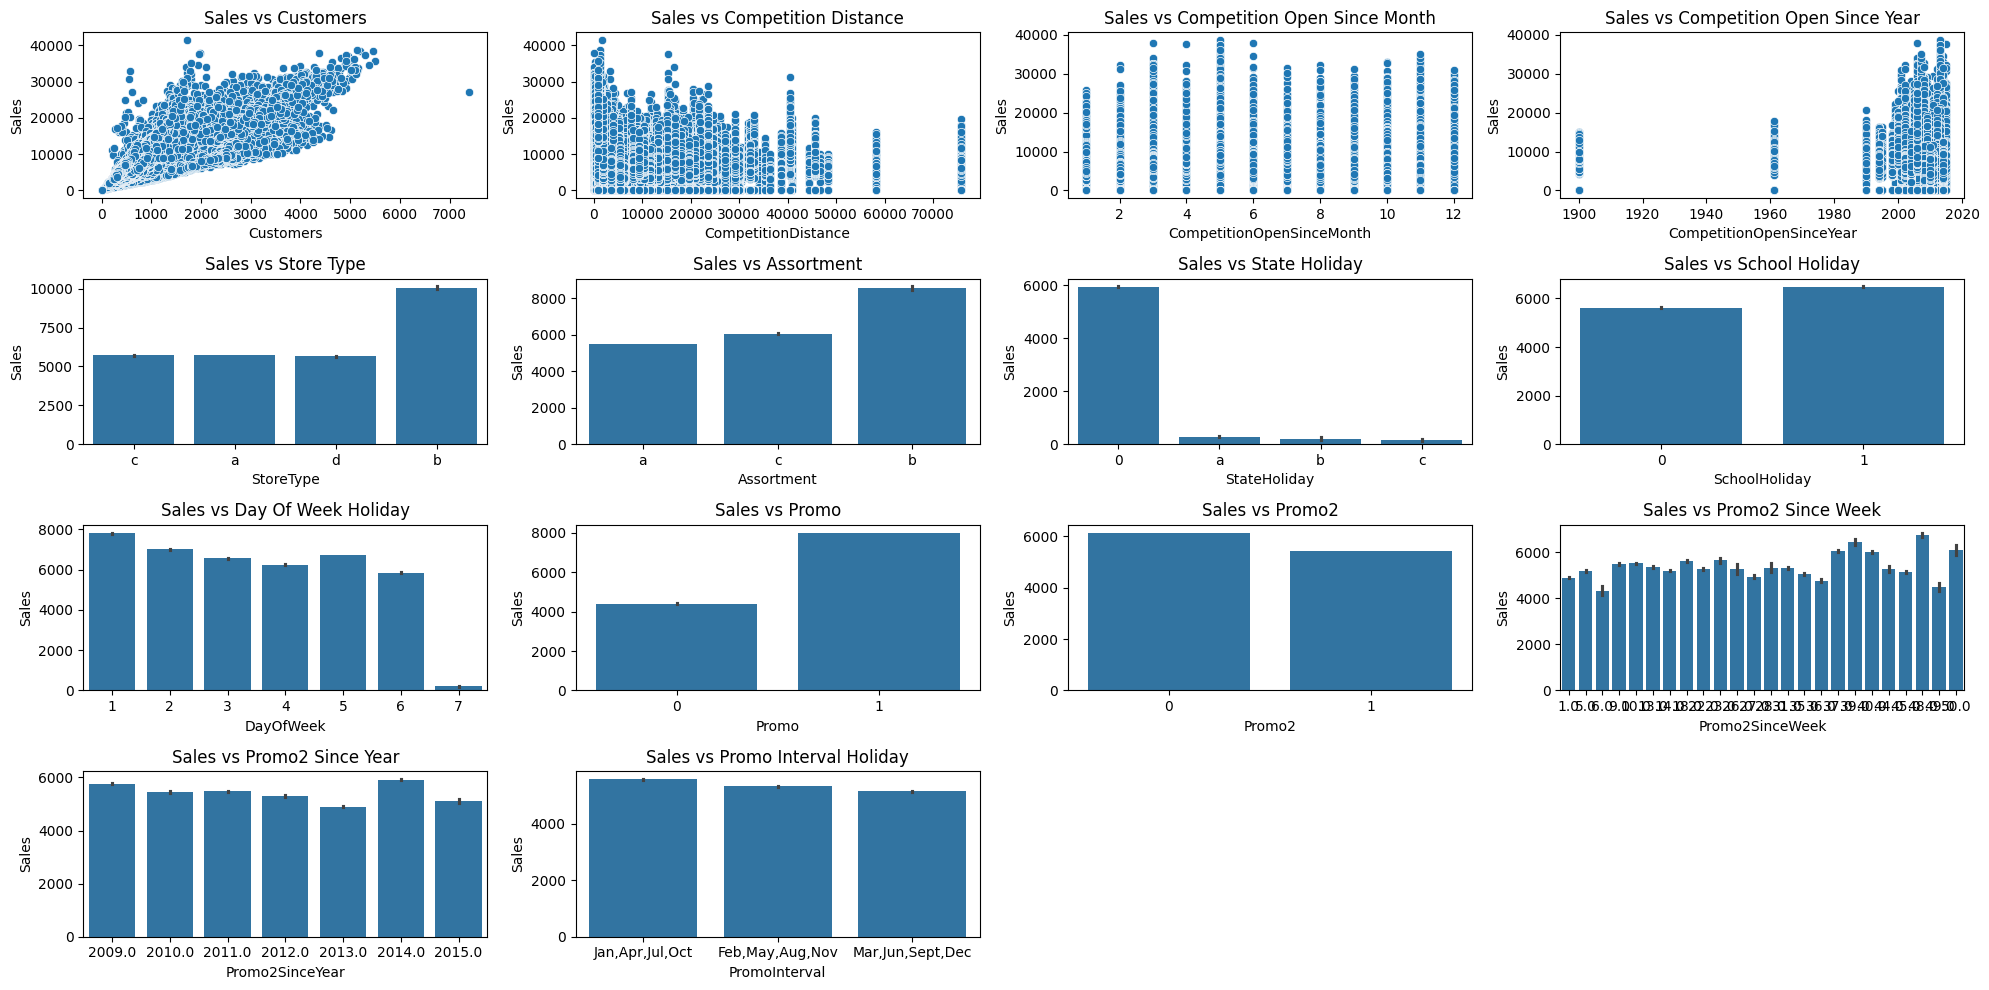

In [34]:
# Bivariate Analysis
def bivariate_analysis(df):
    plt.figure(figsize=(20, 10))

    plt.subplot(4, 4, 1)
    sns.scatterplot(x='Customers', y='Sales', data=df)
    plt.title('Sales vs Customers')

    plt.subplot(4, 4, 2)
    sns.scatterplot(x='CompetitionDistance', y='Sales', data=df)
    plt.title('Sales vs Competition Distance')

    plt.subplot(4, 4, 3)
    sns.scatterplot(x='CompetitionOpenSinceMonth', y='Sales', data=df)
    plt.title('Sales vs Competition Open Since Month')

    plt.subplot(4, 4, 4)
    sns.scatterplot(x='CompetitionOpenSinceYear', y='Sales', data=df)
    plt.title('Sales vs Competition Open Since Year')

    plt.subplot(4, 4, 5)
    sns.barplot(x='StoreType', y='Sales', data=df)
    plt.title('Sales vs Store Type')

    plt.subplot(4, 4, 6)
    sns.barplot(x='Assortment', y='Sales', data=df)
    plt.title('Sales vs Assortment')

    plt.subplot(4, 4, 7)
    sns.barplot(x='StateHoliday', y='Sales', data=df)
    plt.title('Sales vs State Holiday')

    plt.subplot(4, 4, 8)
    sns.barplot(x='SchoolHoliday', y='Sales', data=df)
    plt.title('Sales vs School Holiday')

    plt.subplot(4, 4, 9)
    sns.barplot(x='DayOfWeek', y='Sales', data=df)
    plt.title('Sales vs Day Of Week Holiday')

    plt.subplot(4, 4, 10)
    sns.barplot(x='Promo', y='Sales', data=df)
    plt.title('Sales vs Promo')

    plt.subplot(4, 4, 11)
    sns.barplot(x='Promo2', y='Sales', data=df)
    plt.title('Sales vs Promo2')

    plt.subplot(4, 4, 12)
    sns.barplot(x='Promo2SinceWeek', y='Sales', data=df)
    plt.title('Sales vs Promo2 Since Week')

    plt.subplot(4, 4, 13)
    sns.barplot(x='Promo2SinceYear', y='Sales', data=df)
    plt.title('Sales vs Promo2 Since Year')

    plt.subplot(4, 4, 14)
    sns.barplot(x='PromoInterval', y='Sales', data=df)
    plt.title('Sales vs Promo Interval Holiday')

    plt.tight_layout()
    plt.show()

bivariate_analysis(df)

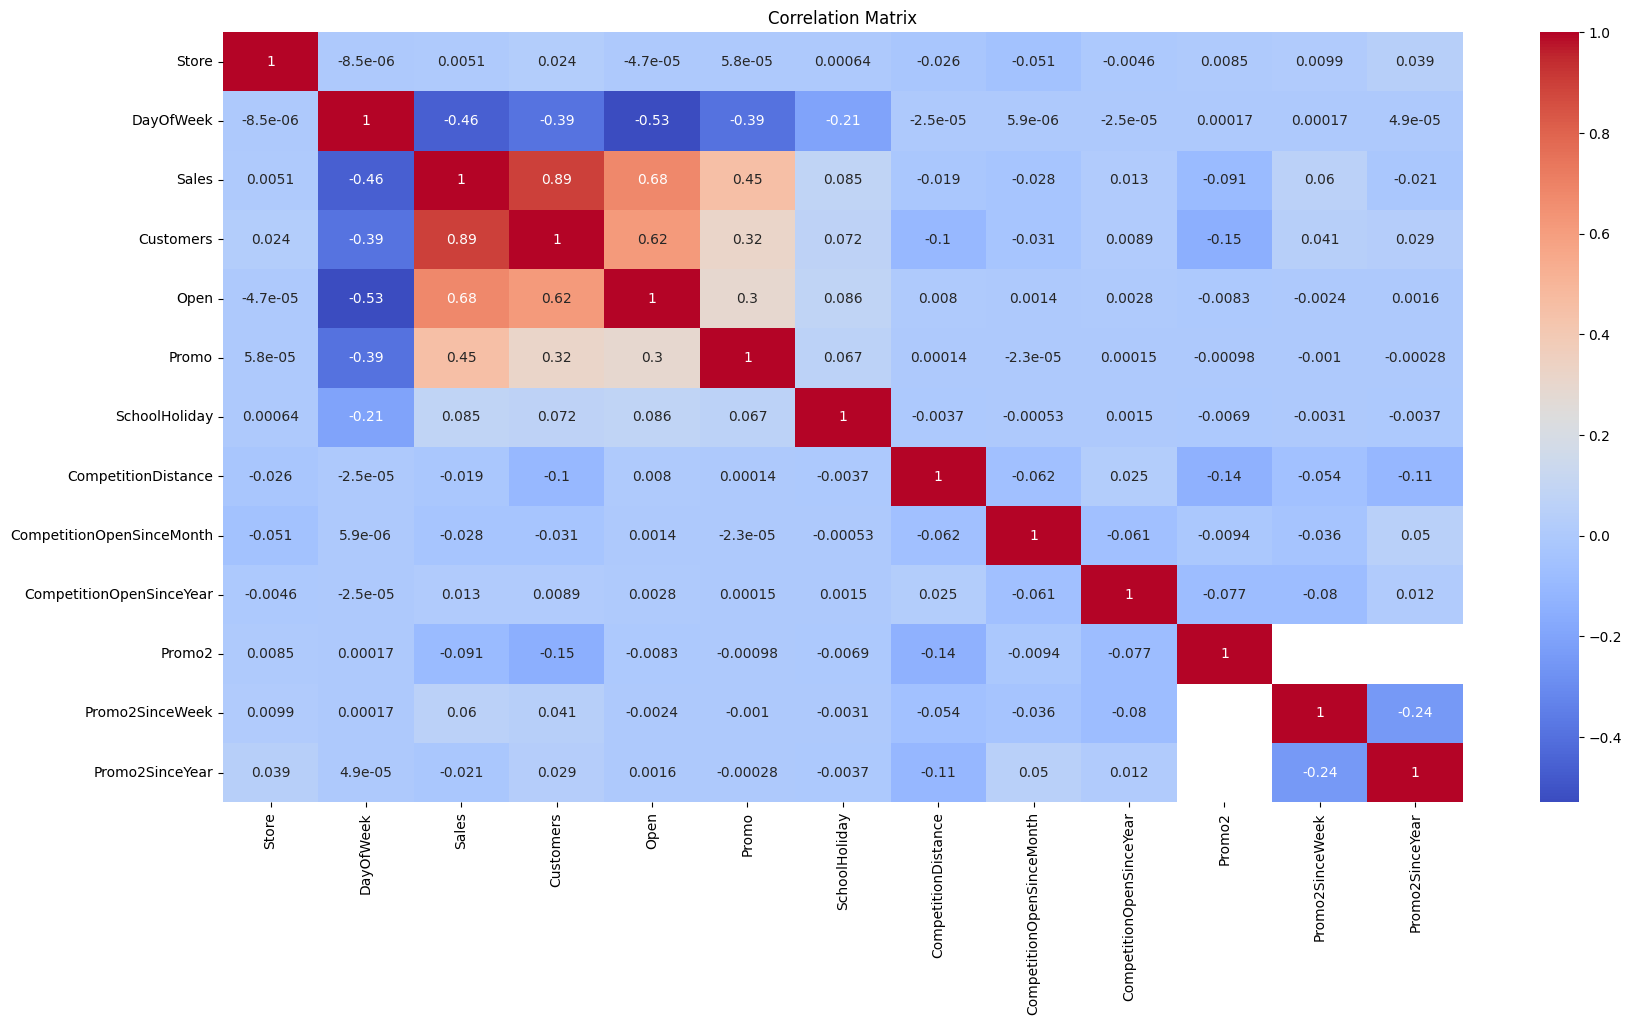

In [31]:
# Multivariate Analysis
def multivariate_analysis(df):
    # Select numeric columns only
    numeric_columns = df.select_dtypes(include=['float64', 'int64'])

    plt.figure(figsize=(20, 10))
    corr = numeric_columns.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()


multivariate_analysis(df)


In [52]:
# Separate numeric features and target variable
numeric_features = df.select_dtypes(include=['float64', 'int64'])
target_variable = df['Sales']

# Compute correlations
correlations = numeric_features.corrwith(target_variable)

# Display correlation coefficients
print("Correlation Coefficients:")
print(correlations)

# Select features with high correlation coefficients (e.g., absolute correlation > 0.5)
high_correlation_features = correlations[abs(correlations) > 0.5].index.tolist()
print("\nFeatures with High Correlation (> 0.5):")
print(high_correlation_features)


Correlation Coefficients:
Store                        0.005126
DayOfWeek                   -0.462125
Sales                        1.000000
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
SchoolHoliday                0.085124
CompetitionDistance         -0.019229
CompetitionOpenSinceMonth   -0.028257
CompetitionOpenSinceYear     0.012659
Promo2                      -0.091040
Promo2SinceWeek              0.059558
Promo2SinceYear             -0.021127
dtype: float64

Features with High Correlation (> 0.5):
['Sales', 'Customers', 'Open']


Number of outliers in each column:
 Store                             0
DayOfWeek                         0
Sales                          3296
Customers                      2181
Open                         158253
Promo                             0
SchoolHoliday                155934
Assortment                        0
CompetitionDistance           58892
CompetitionOpenSinceMonth     11032
CompetitionOpenSinceYear      24400
Promo2                            0
Promo2SinceWeek              191039
Promo2SinceYear              135806
PromoInterval                     0
Year                              0
Month                             0
Day                               0
WeekOfYear                        0
StoreType_b                    5425
StoreType_c                  125314
StoreType_d                       0
StateHoliday_a                18280
StateHoliday_b                 6022
StateHoliday_c                 3696
dtype: int64


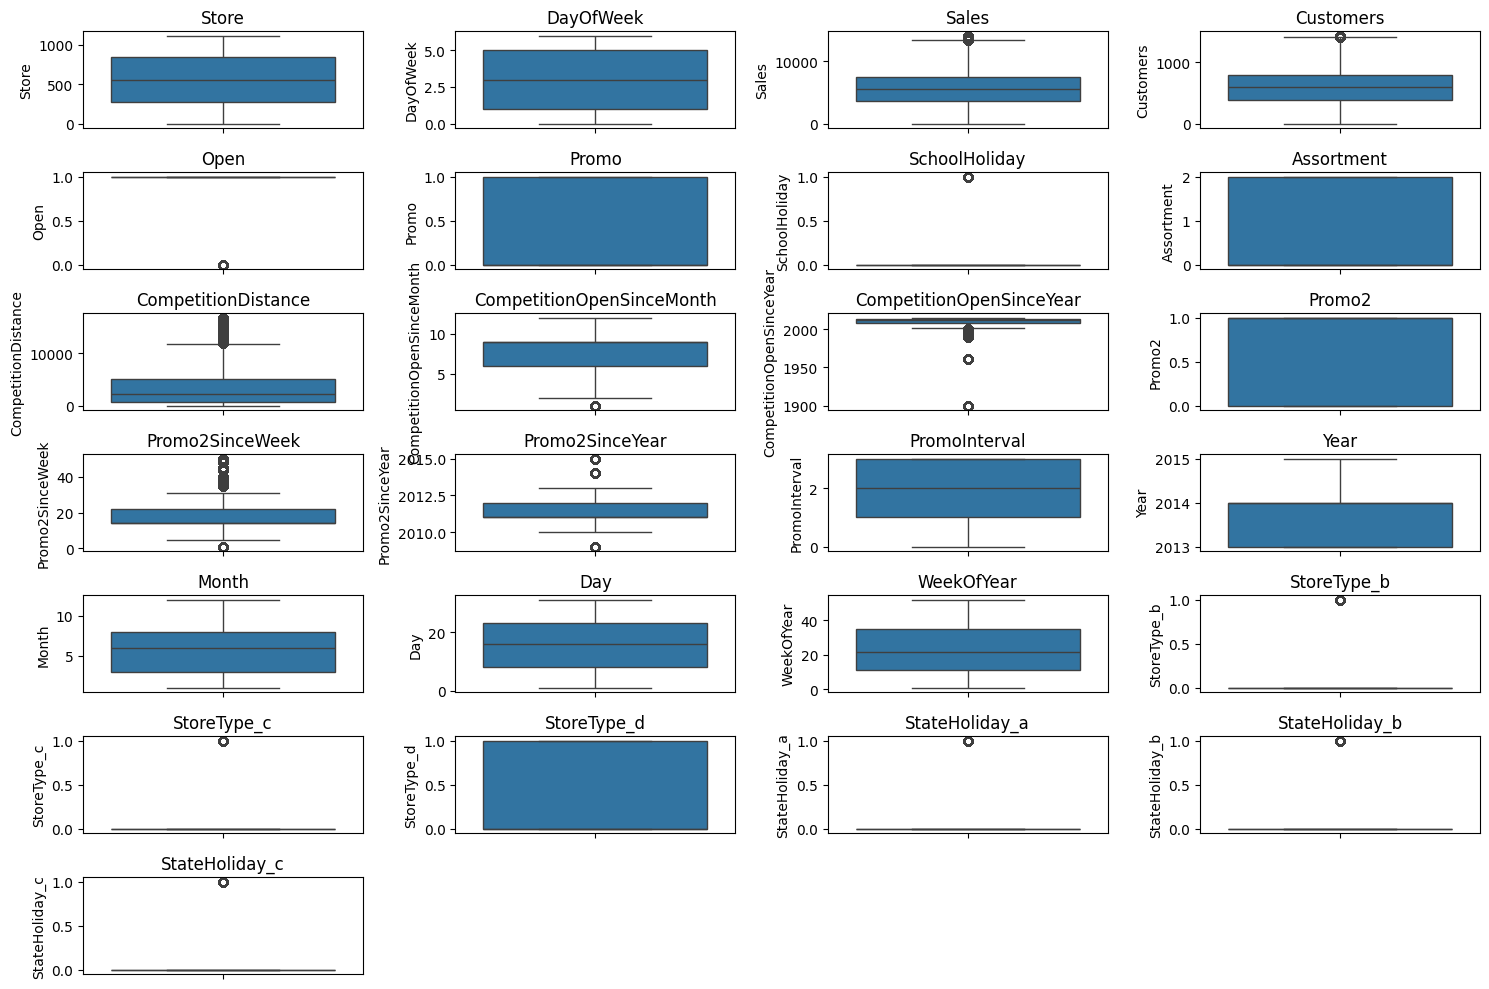

Original data size: (879882, 25)
Data size after removing outliers: (316560, 25)


In [36]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
    return is_outlier

# Apply the outlier detection function to each numerical column
outliers = df.select_dtypes(include=[np.number]).apply(detect_outliers_iqr, axis=0)

# Count the number of outliers in each column
outliers_count = outliers.sum()
print("Number of outliers in each column:\n", outliers_count)

# List of numerical features
numeric_features = df.select_dtypes(include=[np.number]).columns

# Determine the layout for subplots
num_features = len(numeric_features)
num_cols = 4  # Number of columns for subplots
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a box plot for each numerical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(feature)
    plt.tight_layout()

plt.show()

# # Remove outliers from the DataFrame (Optional)
# df_no_outliers = df[~((outliers).any(axis=1))]
# print(f"Original data size: {df.shape}")
# print(f"Data size after removing outliers: {df_no_outliers.shape}")


## Missing Value Treatement

In [73]:
# Check for missing values in the sales dataset
print("Missing values in Sales DataFrame:")
print(df.isnull().sum())

Missing values in Sales DataFrame:
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


In [74]:
# Calculate the percentage of missing values for each column
missing_percent = df.isnull().mean() * 100
missing_percent

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
dtype: float64

#### filling missing values of CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear with knn imputer and dropping Promo2SinceWeek, Promo2SinceYear, PromoInterval since missing values are ~50%


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [76]:
# Fill missing values in CompetitionDistance with median value
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)

# Fill missing values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear with mode
df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode()[0], inplace=True)

# Fill missing values in Promo2SinceWeek and Promo2SinceYear with mode
df['Promo2SinceWeek'].fillna(df['Promo2SinceWeek'].mode()[0], inplace=True)
df['Promo2SinceYear'].fillna(df['Promo2SinceYear'].mode()[0], inplace=True)

# Fill missing values in PromoInterval with 'None'
df['PromoInterval'].fillna('0', inplace=True)

# df = df.drop(['PromoInterval','Promo2SinceWeek','Promo2SinceYear'], axis = 1)

# Verify the changes
print("Missing values in Store DataFrame after handling:")
print(df.isnull().sum())

Missing values in Store DataFrame after handling:
Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


# Handling non-numeric data

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [78]:
# Convert date columns to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Feature engineering to create new date-related features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek

<ipython-input-78-7e78213e76c2>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [79]:
# Drop unnecessary columns
df.drop(['Date'], axis=1, inplace=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int32  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209 non-null  float64
 13  Promo2      

#### Perform Data Encoding

In [81]:
# Ensure consistent data types in categorical columns
categorical_columns = ['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval']
for col in categorical_columns:
  df[col] = df[col].astype(str)

# Encode categorical variables
# OneHotEncode 'StoreType' and 'StateHoliday'
onehot_encoder = OneHotEncoder(sparse=False,drop='first')
onehot_encoded_cols = pd.DataFrame(onehot_encoder.fit_transform(df[['StoreType', 'StateHoliday']]))
onehot_encoded_cols.columns = onehot_encoder.get_feature_names_out(['StoreType', 'StateHoliday'])

# LabelEncode 'Assortment' and 'PromoInterval'
label_encoder = LabelEncoder()
df['Assortment'] = label_encoder.fit_transform(df['Assortment'])
df['PromoInterval'] = label_encoder.fit_transform(df['PromoInterval'])

# Drop original columns and merge with onehot encoded columns
df.drop(['StoreType', 'StateHoliday'], axis=1, inplace=True)
df = pd.concat([df, onehot_encoded_cols], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int32  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   SchoolHoliday              1017209 non-null  int64  
 7   Assortment                 1017209 non-null  int64  
 8   CompetitionDistance        1017209 non-null  float64
 9   CompetitionOpenSinceMonth  1017209 non-null  float64
 10  CompetitionOpenSinceYear   1017209 non-null  float64
 11  Promo2                     1017209 non-null  int64  
 12  Promo2SinceWeek            1017209 non-null  float64
 13  Promo2SinceY

###Perform Data Scaling

In [83]:
# Scale the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [84]:
# Create the final DataFrame
scaled_df = pd.DataFrame(scaled_data,columns=df.columns)
scaled_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Year,Month,Day,WeekOfYear,StoreType_b,StoreType_c,StoreType_d,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,-1.73164,0.501484,-0.132683,-0.168269,0.452399,1.273237,2.144211,-0.940975,-0.538742,0.436247,...,1.502077,0.346724,1.740766,0.511626,-0.125731,2.536447,-0.666551,-0.142555,-0.081366,-0.063616
1,-1.73164,0.000831,-0.195801,-0.187648,0.452399,1.273237,2.144211,-0.940975,-0.538742,0.436247,...,1.502077,0.346724,1.626969,0.511626,-0.125731,2.536447,-0.666551,-0.142555,-0.081366,-0.063616
2,-1.73164,-0.499823,-0.257620,-0.237173,0.452399,1.273237,2.144211,-0.940975,-0.538742,0.436247,...,1.502077,0.346724,1.513173,0.511626,-0.125731,2.536447,-0.666551,-0.142555,-0.081366,-0.063616
3,-1.73164,-1.000476,-0.198139,-0.157502,0.452399,1.273237,2.144211,-0.940975,-0.538742,0.436247,...,1.502077,0.346724,1.399377,0.511626,-0.125731,2.536447,-0.666551,-0.142555,-0.081366,-0.063616
4,-1.73164,-1.501129,0.085244,-0.045533,0.452399,1.273237,2.144211,-0.940975,-0.538742,0.436247,...,1.502077,0.346724,1.285581,0.511626,-0.125731,2.536447,-0.666551,-0.142555,-0.081366,-0.063616


##Creating Model

In [85]:
x = scaled_df.drop(['Sales'], axis=1)
y = scaled_df['Sales']

In [86]:
# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [87]:
x_train.duplicated().sum()

0

## Different models with their performance

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Function to evaluate models
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)

    # Predict on training set
    y_train_pred = model.predict(x_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

    # Predict on test set
    y_test_pred = model.predict(x_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

    return {
        'train': {'RMSE': rmse_train, 'MAE': mae_train, 'R²': r2_train, 'MAPE': mape_train},
        'test': {'RMSE': rmse_test, 'MAE': mae_test, 'R²': r2_test, 'MAPE': mape_test}
    }


# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Evaluate models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, x_train, x_test, y_train, y_test)
    # results[name] = {"RMSE": rmse, "MAE": mae, "R²": r2, "MAPE":mape}


# Display results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print("Training Performance:")
    print(f"  RMSE: {metrics['train']['RMSE']}")
    print(f"  MAE: {metrics['train']['MAE']}")
    print(f"  R²: {metrics['train']['R²']}")
    print(f"  MAPE: {metrics['train']['MAPE']}")
    print("Testing Performance:")
    print(f"  RMSE: {metrics['test']['RMSE']}")
    print(f"  MAE: {metrics['test']['MAE']}")
    print(f"  R²: {metrics['test']['R²']}")
    print(f"  MAPE: {metrics['test']['MAPE']}")
    print("-" * 30)

Linear Regression:
Training Performance:
  RMSE: 0.32254669766284527
  MAE: 0.2285493667903905
  R²: 0.8960472255956601
  MAPE: 2.298628296785937
Testing Performance:
  RMSE: 0.31995406420604483
  MAE: 0.22763324496658455
  R²: 0.8972977453562232
  MAPE: 2.064413119617965
------------------------------
Decision Tree:
Training Performance:
  RMSE: 9.082843239594572e-13
  MAE: 3.7133379579725865e-13
  R²: 1.0
  MAPE: 2.476016314912632e-13
Testing Performance:
  RMSE: 0.16178327810307833
  MAE: 0.09708696391317627
  R²: 0.973741375214577
  MAPE: 1.0782904667963784
------------------------------
Random Forest:
Training Performance:
  RMSE: 0.042464626617136556
  MAE: 0.02553045269494283
  R²: 0.9981982044719913
  MAPE: 0.31153707248116225
Testing Performance:
  RMSE: 0.1131711780901561
  MAE: 0.06814474589107394
  R²: 0.987150791118635
  MAPE: 0.7266955587271268
------------------------------
XGBoost:
Training Performance:
  RMSE: 0.1339061477964444
  MAE: 0.0926822527415004
  R²: 0.982083

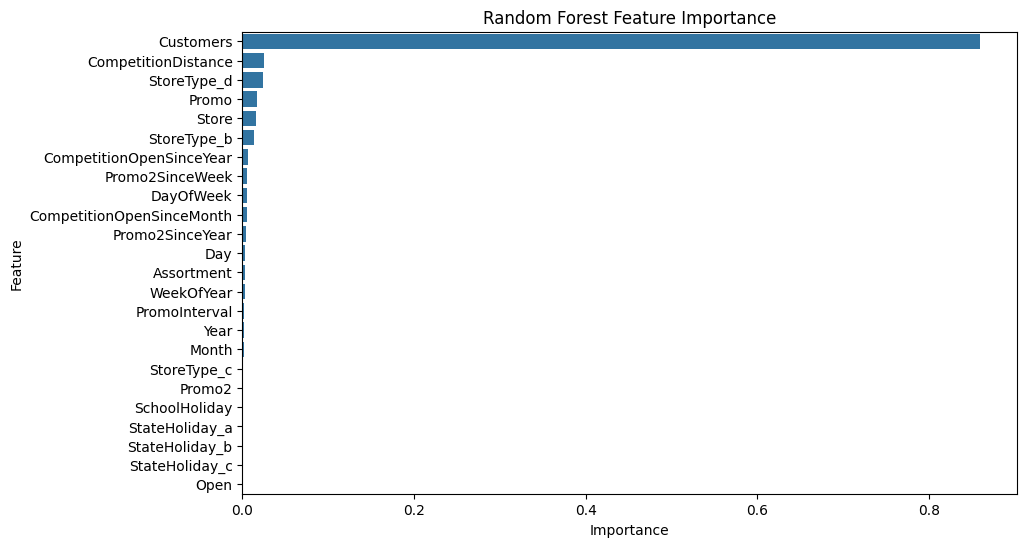

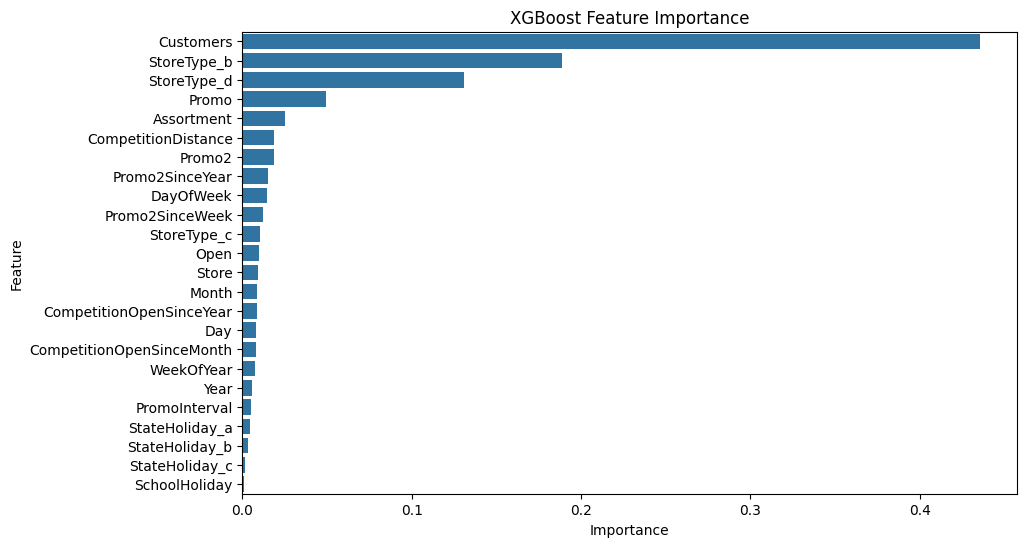

In [89]:
# Feature importance for tree-based models
def plot_feature_importance(model, x_train, model_name):
    feature_importances = model.feature_importances_
    features = x_train.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'{model_name} Feature Importance')
    plt.show()

# Plot feature importance for Random Forest and XGBoost
plot_feature_importance(models['Random Forest'], x_train, 'Random Forest')
plot_feature_importance(models['XGBoost'], x_train, 'XGBoost')

### Xgboost model

In [90]:
# Define the XGBoost regressor model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror',
                          colsample_bytree=0.8,
                          learning_rate=0.05,
                          max_depth=3,
                          min_child_weight = 2,
                          subsample=0.6,
                          reg_alpha = 1,
                          reg_lambda = 1,
                          gamma=1,
                          n_estimators=100)

In [91]:
xg_reg.fit(x_train, y_train, early_stopping_rounds=10, eval_set=[(x_test, y_test)])

[0]	validation_0-rmse:0.95804


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:0.91992
[2]	validation_0-rmse:0.88404
[3]	validation_0-rmse:0.85002
[4]	validation_0-rmse:0.81787
[5]	validation_0-rmse:0.78779
[6]	validation_0-rmse:0.75971
[7]	validation_0-rmse:0.73291
[8]	validation_0-rmse:0.70817
[9]	validation_0-rmse:0.68451
[10]	validation_0-rmse:0.66234
[11]	validation_0-rmse:0.64130
[12]	validation_0-rmse:0.62153
[13]	validation_0-rmse:0.60335
[14]	validation_0-rmse:0.59082
[15]	validation_0-rmse:0.57380
[16]	validation_0-rmse:0.55795
[17]	validation_0-rmse:0.54282
[18]	validation_0-rmse:0.52891
[19]	validation_0-rmse:0.51557
[20]	validation_0-rmse:0.50311
[21]	validation_0-rmse:0.49120
[22]	validation_0-rmse:0.47983
[23]	validation_0-rmse:0.47273
[24]	validation_0-rmse:0.46237
[25]	validation_0-rmse:0.45576
[26]	validation_0-rmse:0.44970
[27]	validation_0-rmse:0.44058
[28]	validation_0-rmse:0.43217
[29]	validation_0-rmse:0.42717
[30]	validation_0-rmse:0.42282
[31]	validation_0-rmse:0.41874
[32]	validation_0-rmse:0.41131
[33]	validation_0

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [92]:
# Make predictions
y_train_pred = xg_reg.predict(x_train)
y_test_pred = xg_reg.predict(x_test)

Training Set Metrics:
Mean Squared Error: 0.07724046901920271
Mean Absolute Error: 0.1885834430429515
R-squared: 0.9228215970711594
---
Test Set Metrics:
Mean Squared Error: 0.07606887132546872
Mean Absolute Error: 0.18788384900219296
R-squared: 0.9236846873128226


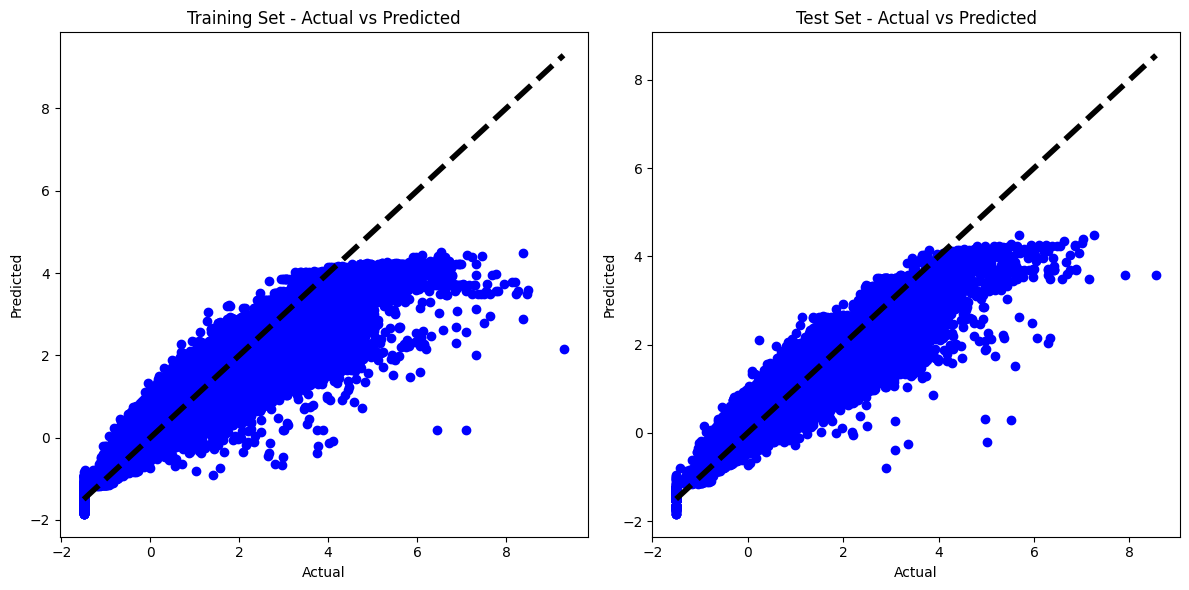

In [93]:
# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print(f"Mean Squared Error: {train_mse}")
print(f"Mean Absolute Error: {train_mae}")
print(f"R-squared: {train_r2}")
print("---")
print("Test Set Metrics:")
print(f"Mean Squared Error: {test_mse}")
print(f"Mean Absolute Error: {test_mae}")
print(f"R-squared: {test_r2}")

# Plotting metrics
plt.figure(figsize=(12, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Set - Actual vs Predicted')

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set - Actual vs Predicted')

plt.tight_layout()
plt.show()

Cross-Validation RMSE: [0.27623723 0.27984235 0.2798651  0.27669091 0.27814894]
Average RMSE: 0.27815690574958035


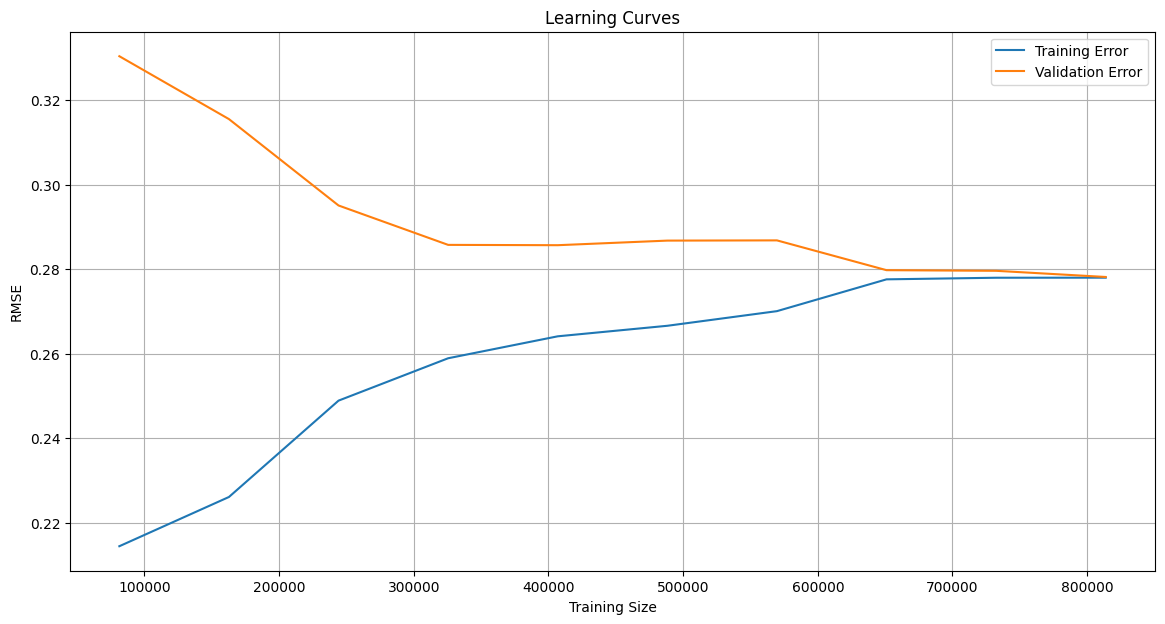

In [94]:
from sklearn.model_selection import KFold, cross_val_score, learning_curve

# Step 1: Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(xg_reg, x, y, cv=kf, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_results)

print(f'Cross-Validation RMSE: {cv_rmse}')
print(f'Average RMSE: {cv_rmse.mean()}')

# Step 2: Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(
    xg_reg, x, y, cv=kf, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.sqrt(-train_scores).mean(axis=1)
test_scores_mean = np.sqrt(-test_scores).mean(axis=1)

plt.figure(figsize=(14, 7))
plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Validation Error')
plt.ylabel('RMSE')
plt.xlabel('Training Size')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()

## MLP model

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras import Sequential
from keras.layers import BatchNormalization, Dropout
# Define the MLP model
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))
model.summary()

NameError: name 'x_train' is not defined

In [62]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [63]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor="val_loss", min_delta=0.01,patience=10, verbose=1)

In [64]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=128, callbacks = callback)


Epoch 1/100
6358/6358 [==============================] - 38s 6ms/step - loss: 0.0561 - mean_absolute_error: 0.1739 - val_loss: 0.0299 - val_mean_absolute_error: 0.1249
Epoch 2/100
6358/6358 [==============================] - 36s 6ms/step - loss: 0.0557 - mean_absolute_error: 0.1731 - val_loss: 0.0308 - val_mean_absolute_error: 0.1150
Epoch 3/100
6358/6358 [==============================] - 40s 6ms/step - loss: 0.0556 - mean_absolute_error: 0.1731 - val_loss: 0.0348 - val_mean_absolute_error: 0.1371
Epoch 4/100
6358/6358 [==============================] - 39s 6ms/step - loss: 0.0554 - mean_absolute_error: 0.1725 - val_loss: 0.0278 - val_mean_absolute_error: 0.1090
Epoch 5/100
6358/6358 [==============================] - 36s 6ms/step - loss: 0.0551 - mean_absolute_error: 0.1722 - val_loss: 0.0309 - val_mean_absolute_error: 0.1218
Epoch 6/100
6358/6358 [==============================] - 34s 5ms/step - loss: 0.0547 - mean_absolute_error: 0.1717 - val_loss: 0.0321 - val_mean_absolute_error: